# Logistic Regression

In [25]:
%matplotlib inline
import pymc3 as pm
import arviz as az
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import pyjags
import rpy2
from rpy2.robjects.packages import importr
r_coda = importr("coda")
from rpy2.robjects import pandas2ri
pandas2ri.activate()


palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

In [10]:
data_1 = np.random.normal([2.5,2.5],[1,1], [50,2])
data1_x = data_1[:,0]
data1_y = data_1[:,1]

data_2 = np.random.normal([4,4],[1,1], [50,2])
data2_x = data_2[:,0]
data2_y = data_2[:,1]

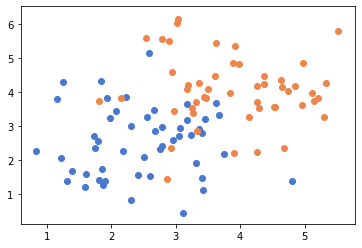

In [11]:
plt.scatter(data1_x, data1_y)
plt.scatter(data2_x, data2_y)

In [12]:
x_0 = np.concatenate([data1_x, data2_x])

In [13]:
y_0 = np.concatenate([np.zeros(50), np.ones(50)])
y_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
jags_code = '''
model{

#Likelihood
  for( i in 1:length(x_0))
    {
      y[i]~dbern(theta[i])
      logit(theta[i])<-alpha+beta*x_0[i]
    }

#priors
alpha~dnorm(0,10)
beta~dnorm(0,10)
theta1<-step(beta-1)
theta2<-1-step(beta-1)

}
'''

In [20]:
jags_data_1 = {"x_0":x_0 }
parameters = ['alpha', 'beta']



In [21]:
jags_model_1 \
    = pyjags.Model(code=jags_code, 
                   data=jags_data_1, 
                   chains=3)

In [22]:
jags_model_1.sample(1000, vars=[])

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


{}

In [23]:
jags_samples_from_model_1 = jags_model_1.sample(5000, vars=parameters)

sampling: iterations 15000 of 15000, elapsed 0:00:00, remaining 0:00:00


In [26]:
idata_jags_model_1 = \
    az.from_pyjags(jags_samples_from_model_1)

In [27]:
az.rhat(idata_jags_model_1)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    alpha    float64 1.0
    beta     float64 1.0

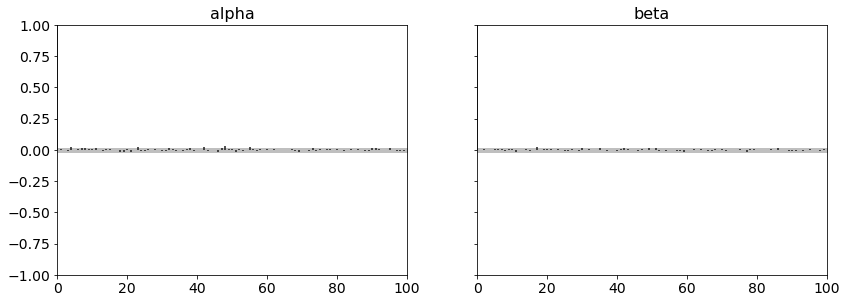

In [28]:
az.plot_autocorr(idata_jags_model_1, combined=True);

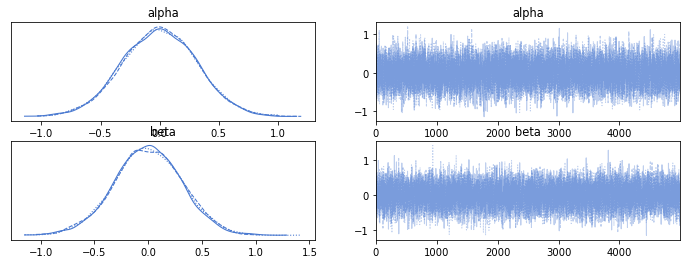

In [29]:
az.plot_trace(idata_jags_model_1);